In [1]:
# The goal is to come up with recommendations for the product and the marketing teams to improve conversion rate
# We have features like country, marketing channel, age, repeat users, and the number of pages visited during that session


In [57]:
import pandas
pandas.set_option('display.max_columns', 10)
pandas.set_option('display.width', 350)
  
#read from google drive
data = pandas.read_csv("C://Users//umittal//Desktop//Data_masked_Conversion//Conversion Project//conversion_project.csv")

In [58]:
print (data.head())

  country  age  new_user source  total_pages_visited  converted
0      UK   25         1    Ads                    1          0
1      US   23         1    Seo                    5          0
2      US   28         1    Seo                    4          0
3   China   39         1    Seo                    5          0
4      US   30         1    Seo                    6          0


In [59]:
#country : user country based on the IP address
#age : user age. Self-reported at sign-up step
# new_user : whether the user created the account during this session or had already an account and simply came back to the site

# source : marketing channel source
  #Ads: came to the site by clicking on an advertisement
  #Seo: came to the site by clicking on search results
  #Direct: came to the site by directly typing the URL on the browser

#total_pages_visited: number of total pages visited during the session. This can be seen as a proxy for time spent on site and engagement
#converted: 1 means they converted within the session, 0 means they left without buying anything. The company goal is to increase conversion rate: # conversions / total sessions



In [60]:
# let’s inspect the data to look for weird behavior/wrong data
print(data.describe())

                 age       new_user  total_pages_visited      converted
count  316200.000000  316200.000000        316200.000000  316200.000000
mean       30.569858       0.685465             4.872966       0.032258
std         8.271802       0.464331             3.341104       0.176685
min        17.000000       0.000000             1.000000       0.000000
25%        24.000000       0.000000             2.000000       0.000000
50%        30.000000       1.000000             4.000000       0.000000
75%        36.000000       1.000000             7.000000       0.000000
max       123.000000       1.000000            29.000000       1.000000


In [61]:
# mean age is 30 and 75% percentile is 36 -> user base is pretty young
# Conversion rate is ~ 3% -> industry standards
# max age 123 yrs looks abnormal. WIll investigate this.

In [62]:
print(data.groupby(['country']).size())

country
China       76602
Germany     13056
UK          48450
US         178092
dtype: int64


In [63]:
# Site is probably a US site, although it does have a large Chinese user base as well


In [64]:
print(data.groupby(['source']).size())

source
Ads        88740
Direct     72420
Seo       155040
dtype: int64


In [65]:

# Investigate the age column
print(sorted(data['age'].unique(), reverse=True))

[123, 111, 79, 77, 73, 72, 70, 69, 68, 67, 66, 65, 64, 63, 62, 61, 60, 59, 58, 57, 56, 55, 54, 53, 52, 51, 50, 49, 48, 47, 46, 45, 44, 43, 42, 41, 40, 39, 38, 37, 36, 35, 34, 33, 32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17]


In [66]:
# Age 123 and 111 values seem unrealistic. How many users are we talking about:

print(data.groupby(['age']).size())


age
17      7597
18      8466
19      9349
20     10156
21     10966
22     11701
23     12336
24     12960
25     13460
26     13931
27     14084
28     14341
29     14158
30     14346
31     13692
32     13507
33     12631
34     12108
35     11471
36     10779
37      9761
38      8970
39      8202
40      7148
41      6401
42      5588
43      4904
44      4224
45      3634
46      2994
47      2504
48      2121
49      1629
50      1356
51      1093
52       935
53       627
54       520
55       394
56       286
57       247
58       165
59       127
60        94
61        71
62        59
63        35
64        27
65        15
66         9
67         5
68         5
69         3
70         2
72         1
73         1
77         1
79         1
111        1
123        1
dtype: int64


In [67]:
# for the age 111 and 123 is just one data point. We can eliminate those data points. Seems like an anomaly
data = data[data['age']<110]

In [68]:
# Now we will look at the class imbalance

data.groupby(['converted']).size()/data.shape[0] * 100


converted
0    96.774806
1     3.225194
dtype: float64

In [69]:
# Class is certainly imbalance 96% majority class and 3% minority class. Normal rule of thumb minority class should be atleast 5% of the data

from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
import warnings 
warnings.filterwarnings ("ignore")
from pandas import DataFrame


In [70]:
df = data


In [71]:
target = ['converted']

In [72]:
# Store categorical column names
#categorical = df.nunique()[df.nunique() < 50].keys().tolist()
categorical = df.nunique().keys().tolist()
categorical


['country', 'age', 'new_user', 'source', 'total_pages_visited', 'converted']

In [73]:
categorical.remove(target[0])

In [74]:
categorical

['country', 'age', 'new_user', 'source', 'total_pages_visited']

In [75]:
df = pandas.get_dummies(data = df, columns = categorical, drop_first=True)


In [76]:
df.describe()

,converted,country_Germany,country_UK,country_US,age_18,...,total_pages_visited_25,total_pages_visited_26,total_pages_visited_27,total_pages_visited_28,total_pages_visited_29
count,316198.000000,316198.000000,316198.000000,316198.000000,316198.000000,...,316198.000000,316198.000000,316198.000000,316198.000000,316198.000000
mean,0.032252,0.041287,0.153224,0.563229,0.026774,...,0.000123,0.000054,0.000022,0.000003,0.000006
std,0.176669,0.198955,0.360203,0.495987,0.161424,...,0.011105,0.007332,0.004705,0.001778,0.002515
min,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000


In [77]:
X = df.values[:, 1::]
y = df.values[:, 0]

In [78]:
print(sorted(Counter(y).items()))


[(0, 306000), (1, 10198)]


In [79]:
X

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]], dtype=int64)

In [80]:
y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [81]:
import pandas as pd
import os,fnmatch
from sklearn.model_selection import train_test_split
import warnings
warnings.simplefilter('ignore')
import numpy as np


import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, precision_recall_fscore_support,roc_auc_score
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from IPython.display import display, HTML

In [82]:
data_list=[]
x=data
list_temp=[]
list_temp.append(x.shape[0])
temp_df=x[x['converted']==1.0]
list_temp.append(temp_df.shape[0])
temp_df=x[x['converted']==0.0]
list_temp.append(temp_df.shape[0])
list_temp.append(len(x.columns)-1)
data_list.append(list_temp) 
df_Print_info = pd.DataFrame(data_list, columns = ['#Samples','#Minority','#Majority','#Features'],
                      index=['Conversion_rate']) 

In [83]:
df_Print_info

,#Samples,#Minority,#Majority,#Features
Conversion_rate,316198,10198,306000,5


In [84]:
def plot_scatter(database,feature1,feature2):
    for x in database:
        x.plot(x=feature1,y=feature2,kind='scatter')

In [85]:
data.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


In [86]:
data['country_dummy']= data['country'].astype('category').cat.codes
data['source_dummy']= data['source'].astype('category').cat.codes



In [87]:
# you can select features x1,x2 but since it is taking all data bases at once you should not exceed more than 7 features 
#  well if you want to plot scatter based on particluar database then         
# databse[0].plot(x='v1',y='v5',kind='scatter')
# Scatter plotting 
X = data['age'].values
y = data['country_dummy'].values
target = data['converted'].values

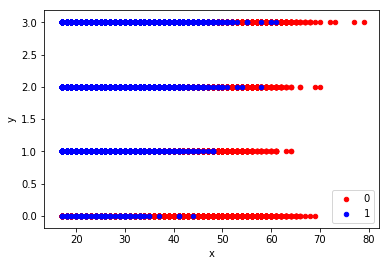

In [88]:
#visualize the data before any work is done
dt = DataFrame(dict(x=X, y=y, label=target))

colors = {0:'red', 1:'blue'}
fig, ax = plt.subplots()
grouped = dt.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()

In [96]:
def model_evaluation_all_model(database, option, class_weight_param):
    h = .02  # step size in the mesh
    
    if option == 'one':
        names = [ "Random Forest"]

        classifiers = [

            RandomForestClassifier(max_depth=5, n_estimators=10, class_weight= class_weight_param)
            ]
        datasets = database[['new_user', 'converted', 'country_dummy','source_dummy']]
        
    if option == 'All':    
        names = ["Logistic Regression","Linear SVM",
             "Decision Tree", "Random Forest", "AdaBoost",
             "Naive Bayes"]

        classifiers = [
            LogisticRegression(solver='liblinear',multi_class='ovr'),
            SVC(kernel="linear", C=0.025),
            DecisionTreeClassifier(max_depth=5),
            RandomForestClassifier(max_depth=5, n_estimators=10 ),
            AdaBoostClassifier(),
            GaussianNB()]
        datasets = database[['new_user', 'converted', 'country_dummy','source_dummy','total_pages_visited']]

    
    
    # iterate over datasets
    
#         print(ds_cnt)
    #print('Dataset{} Evaluation Table'.format(ds_cnt+1))
    # preprocess dataset, split into training and test part
    classes=datasets['converted'].values
    inputs=datasets.drop(columns=['converted']).values
    X, y = inputs,classes
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(inputs,classes,train_size=0.66)
    list_values_train=[]
    list_value_test=[]
    for name, clf in zip(names, classifiers):
        clf.fit(X_train, y_train)
        predicted_train_y=clf.predict(X_train)
        predicted_test_y=clf.predict(X_test)
        report_train=classification_report(y_train,predicted_train_y,output_dict=True)
        report_test=classification_report(y_test,predicted_test_y,output_dict=True)
        key=list(report_test.keys())[0]
        valu_test=list(report_test[key].values())
        valu_train=list(report_train[key].values())
        score_train=clf.score(X_train,y_train)
        valu_train.append(score_train)
        score_test = clf.score(X_test, y_test)
        valu_test.append(score_test)
        list_values_train.append(valu_train)
        list_value_test.append(valu_test)
    
   # if class_weight_param = '{}':
   #     class_weight = 'Default'
    class_weight = class_weight_param
    
        
    if option == 'one':
        df_test=pd.DataFrame(list_value_test, columns = ['precision','recall','f1-score','support','accuracy'],index=[ " Test Random Forest"])
        df_train=pd.DataFrame(list_values_train, columns = ['precision','recall','f1-score','support','accuracy'],index=[ "Train Random Forest"])
        df_accuracy = df_test.append (df_train) 
        #df_accuracy['class_weight'] = pd.series [class_weight_param,class_weight_param]
        
        #display('Train data set accuracy')
        display(df_accuracy)
        #display('Test data set accuracy')
        #display(df_test)
    if option == 'All':
        df_test=pd.DataFrame(list_value_test, columns = ['precision','recall','f1-score','support','accuracy'],index=["Logistic Regression","Linear SVM","Decision Tree", "Random Forest", "AdaBoost","Naive Bayes"])
        df_train=pd.DataFrame(list_values_train, columns = ['precision','recall','f1-score','support','accuracy'],index=["Logistic Regression","Linear SVM","Decision Tree", "Random Forest", "AdaBoost","Naive Bayes"])
        display('Train data set accuracy')
        display(df_train)
        display('Test data set accuracy')
        display(df_test)
    

 
    
   

    

In [97]:
option = 'All'
class_weight_param = {}#'balanced'   #{0:1, 1:10}
model_evaluation_all_model(data, option, class_weight_param)

'Train data set accuracy'

,precision,recall,f1-score,support,accuracy
Logistic Regression,0.988289,0.996178,0.992218,201963,0.984877
Linear SVM,0.987675,0.996727,0.992180,201963,0.984796
Decision Tree,0.988045,0.996816,0.992411,201963,0.985246
Random Forest,0.987959,0.996955,0.992437,201963,0.985294
AdaBoost,0.988371,0.996544,0.992441,201963,0.985308
Naive Bayes,0.992376,0.988706,0.990538,201963,0.981719


'Test data set accuracy'

,precision,recall,f1-score,support,accuracy
Logistic Regression,0.988168,0.996184,0.992160,104037,0.984764
Linear SVM,0.987525,0.996761,0.992121,104037,0.984680
Decision Tree,0.987969,0.996895,0.992412,104037,0.985248
Random Forest,0.987931,0.996915,0.992403,104037,0.985229
AdaBoost,0.988369,0.996501,0.992419,104037,0.985266
Naive Bayes,0.992789,0.988600,0.990690,104037,0.982020


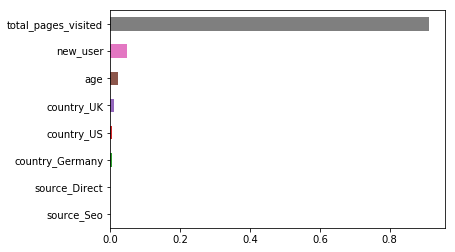

In [38]:
# We will choose random forest because it provides the highest accuracy
# Train and test errors are very close that means model is not overfitting
data_dummy = pandas.get_dummies(data[['country', 'age', 'new_user', 'source', 'total_pages_visited', 'converted']], drop_first=True)
train, test = train_test_split(data_dummy, test_size = 0.34)
rf = RandomForestClassifier(max_depth=5, n_estimators=10)
rf.fit(train.drop('converted', axis=1), train['converted'])
feat_importances = pandas.Series(rf.feature_importances_, index=train.drop('converted', axis=1).columns)
feat_importances.sort_values().plot(kind='barh')
plt.show()

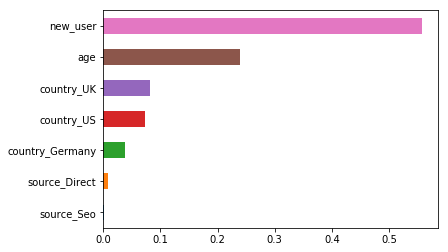

In [39]:
### total page visited is the most important one, which is unfortunately least actionable
## Let's build the model without this feature

data_dummy = pandas.get_dummies(data[['country', 'age', 'new_user', 'source',  'converted']], drop_first=True)
train, test = train_test_split(data_dummy, test_size = 0.34)
rf = RandomForestClassifier(max_depth=5, n_estimators=10)
rf.fit(train.drop('converted', axis=1), train['converted'])
feat_importances = pandas.Series(rf.feature_importances_, index=train.drop('converted', axis=1).columns)
feat_importances.sort_values().plot(kind='barh')
plt.show()



In [40]:

option = 'one'

class_weight_param = [{},'balanced'   ,{0:1, 1:10}]

class_weight_param [0]



{}

In [41]:
model_evaluation_all_model(data, option, class_weight_param [2])

,precision,recall,f1-score,support,accuracy
Test Random Forest,0.973971,0.943517,0.958502,104103,0.920890
Train Random Forest,0.973357,0.943124,0.958002,201897,0.920001


In [42]:
# We know classes are imbalanced, we will not take the default option. I have option 3. Accuracy goes down compared to the default option but better than balanced option

# Let’s check partial dependence plots for the 4 vars:

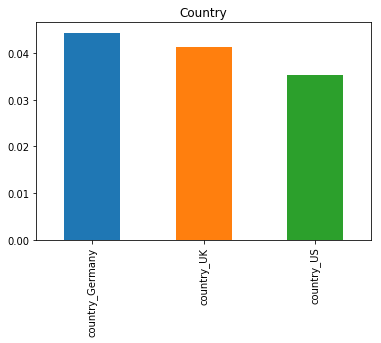

In [43]:
from pdpbox import pdp, info_plots
  
#country
pdp_iso = pdp.pdp_isolate( model=rf, 
                          dataset=train.drop(['converted'], axis=1),      
                          model_features=list(train.drop(['converted'], axis=1)), 
                          feature=['country_Germany', 'country_UK', 'country_US'], 
                          num_grid_points=50)
pdp_dataset = pandas.Series(pdp_iso.pdp, index=pdp_iso.display_columns)
pdp_dataset.sort_values(ascending=False).plot(kind='bar', title='Country')
plt.show()

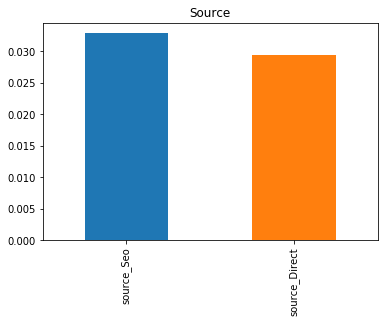

In [44]:
#PDP source
pdp_iso = pdp.pdp_isolate( model=rf, 
                          dataset=train.drop(['converted'], axis=1),      
                          model_features=list(train.drop(['converted'], axis=1)), 
                          feature=['source_Direct', 'source_Seo'], 
                          num_grid_points=50)
pdp_dataset = pandas.Series(pdp_iso.pdp, index=pdp_iso.display_columns)
pdp_dataset.sort_values(ascending=False).plot(kind='bar', title='Source')
plt.show()

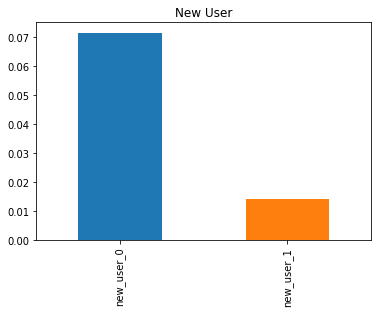

In [45]:
#new user
pdp_iso = pdp.pdp_isolate( model=rf, 
                          dataset=train.drop(['converted'], axis=1),      
                          model_features=list(train.drop(['converted'], axis=1)), 
                          feature='new_user', 
                          num_grid_points=50)
pdp_dataset = pandas.Series(pdp_iso.pdp, index=pdp_iso.display_columns)
pdp_dataset.sort_values(ascending=False).plot(kind='bar', title='New User')
plt.show()

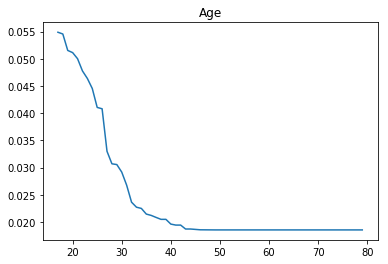

In [46]:
#age
pdp_iso = pdp.pdp_isolate( model=rf, 
                          dataset=train.drop(['converted'], axis=1),      
                          model_features=list(train.drop(['converted'], axis=1)), 
                          feature='age', 
                          num_grid_points=50)
pdp_dataset = pandas.Series(pdp_iso.pdp, index=pdp_iso.feature_grids)
pdp_dataset.plot(title='Age')
plt.show()

In [47]:
# Site works well for <30 yr old
# Germany users are the best 
# Users with old account are much better than new users
# Source is irrelevant


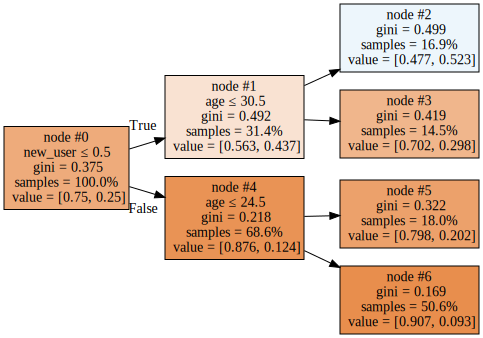

In [52]:
#conda remove graphviz 
#conda install python-graphviz
#graphviz.Source(dot_graph).view()


import graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from graphviz import Source
  
tree = DecisionTreeClassifier( max_depth=2,class_weight={0:1, 1:10}, min_impurity_decrease = 0.001)
tree.fit(train.drop(['converted'], axis=1), train['converted'])
  
#visualize it
#export_graphviz(tree, out_file="tree_conversion.dot", feature_names=train.drop(['converted'], axis=1).columns, proportion=True, rotate=True)
###with open("tree_conversion.dot") as f:
###    dot_graph = f.read()
  
###s = Source.from_file("tree_conversion.dot")
###s.view()


trained_tree1 = export_graphviz(tree,
                                     out_file=None,
                                     feature_names=train.drop(['converted'], axis=1).columns,
                                     filled=True,
                                     node_ids=True,
                                     proportion=True,
                                     rotate=True,
                                     special_characters=True)

tree_viz1 = graphviz.Source(trained_tree1, format='png')
tree_viz1

In [ ]:
# Decision tree explains the randomforest findings
